# Classification Project

## File IO

Only File IO...

You may not change this code.

In [1]:
# Base Module of data processing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

# x_data = pd.read_csv(askopenfilename(title='Choose your training data'))

# y_data = pd.read_csv(askopenfilename(title='Choose your training answer'))

data_path = ['../../13week_project_data/Iris_Data']
x_file_path = os.sep.join(data_path + ['data.csv'])
x_data = pd.read_csv(x_file_path)

y_file_path = os.sep.join(data_path + ['answer.csv'])
y_data = pd.read_csv(y_file_path)

y_data = y_data.iloc[:, 0]

# ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

In [3]:
from sklearn.model_selection import train_test_split
# Split as train data and test data
tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.3, shuffle=True)
# tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [4]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

## Predict Algorithm

Type your source code (Champion Algorithm)

0.9555555555555556
F-Score: 0.956
Accuracy:  0.9555555555555556
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        15
          2       1.00      0.88      0.93        16
          3       0.88      1.00      0.93        14

avg / total       0.96      0.96      0.96        45



C:\Users\ys\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Text(0.5,4.5,'Ground Truth')

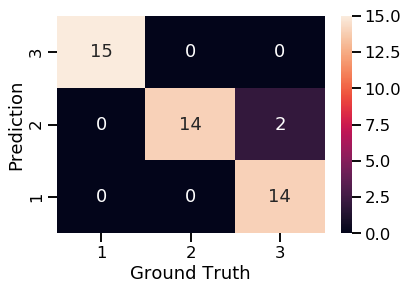

In [5]:
# data_df = pd.DataFrame(ts_data)
# data_df.to_csv("Iris_ts_data.csv", mode='w')
# ans_df = pd.DataFrame(ts_ans)
# ans_df.to_csv("Iris_ts_ans.csv", mode='w')

# # KNN, neighbors=5
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier(n_neighbors=5)
# KNN = KNN.fit(tr_data, tr_ans)
# y_pred = KNN.predict(ts_data)

# # GNB
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb = gnb.fit(tr_data, tr_ans)
# y_pred = gnb.predict(ts_data)
               
# # SVM
# from sklearn.svm import LinearSVC
# LinSVC = LinearSVC()
# LinSVC = LinSVC.fit(tr_data, tr_ans)
# y_pred = LinSVC.predict(ts_data)

# # Bagging
# from sklearn.ensemble import BaggingClassifier
# BC = BaggingClassifier(n_estimators=50)
# BC = BC.fit(tr_data, tr_ans)
# y_pred = BC.predict(ts_data)

# # RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=4, random_state=7, max_leaf_nodes=3)
RF = RF.fit(tr_data, tr_ans)
y_pred = RF.predict(ts_data)
print(accuracy(ts_ans, y_pred))



# Test
prediction = RF.predict(ts_data)

# Check Result
p,r,f,s = precision_recall_fscore_support(ts_ans, prediction, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(ts_ans, prediction))

print(classification_report(ts_ans, prediction))

labels = sorted(ts_ans.unique())
chart = pd.DataFrame(confusion_matrix(ts_ans, prediction),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')


# End of Demo

## Check Accuracy

Only for check accuracy

0.9777777777777777
F-Score: 0.978
Accuracy:  0.9777777777777777
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        15
          2       1.00      0.94      0.97        16
          3       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        45



Text(0.5,4.5,'Ground Truth')

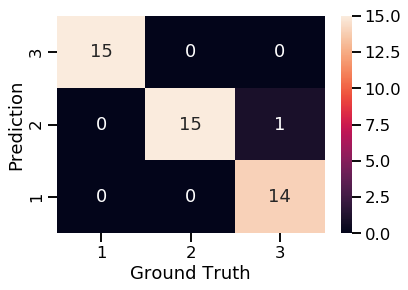

In [6]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RF.fit(tr_data, tr_ans)
y_pred2 = RF.predict(ts_data)
print(accuracy(ts_ans, y_pred2))


# Test
prediction = RF.predict(ts_data)

# Check Result
p,r,f,s = precision_recall_fscore_support(ts_ans, prediction, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(ts_ans, prediction))

print(classification_report(ts_ans, prediction))

labels = sorted(ts_ans.unique())
chart = pd.DataFrame(confusion_matrix(ts_ans, prediction),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')

In [7]:
print("Prediction in training data: {:.3f}".format(RF.score(tr_data, tr_ans)))
print("Prediction in test data: {:.3f}".format(RF.score(ts_data, ts_ans)))

Prediction in training data: 0.990
Prediction in test data: 0.978


In [8]:
# def accuracy(real, predict):
#     return sum(real == predict) / float(real.shape[0])
# 
# tk_window = tkinter.Tk()
# cwd = os.getcwd()
# ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
# ts_ans = ts_ans.iloc[:, 0]
# tk_window.destroy()

# print(accuracy(ts_ans, y_pred))